## Бутстрап
Бутстрап позволяет многократно извлекать подвыборки из выборки, полученной в рамках экспериментва

В полученных подвыборках считаются статистики (среднее, медиана и т.п.)

Из статистик можно получить ее распределение и взять доверительный интервал

ЦПТ, например, не позволяет строить доверительные интервал для медианы, а бутстрэп это может сделать

### Задача
Нужно понять, стали ли мы больше зарабатывать с пользователя или нет. Вы уже знаете о существовании t-теста, U-теста Mann-Whitney и бутстрапа. Открытый вопрос: какой инструмент использовать?

1. Посчитайте p-value тремя способами: t-тест, U-тест, бутстрап средних

2. Сравните результат между тестом и контролем по всем этим кейсам

3. Напишите выводы, которые можно сделать на основе анализа примененных критериев. Напишите, почему мы должны использовать тот или иной инструмент: каких предположений о случайной величине нужно придерживаться, какие условия необходимы и т.п.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

plt.style.use('ggplot')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

from   scipy.stats import mannwhitneyu
from   scipy.stats import ttest_ind
from   scipy.stats import f_oneway

In [3]:
data = pd.read_csv(r"C:\Users\mesii\Jupiter 2.0\Karpov\lesson\Statisticks\bootstrap\hw_bootstrap.csv", sep = ';')

In [4]:
data.head()

,Unnamed: 0,value,experimentVariant
0,1,"10,3804953740268",Control
1,2,"9,54686666784264",Control
2,3,"11,0882146509904",Control
3,4,"10,1472740570122",Control
4,5,"9,78980767524929",Control


In [5]:
data.value = data.value.str.replace(',','.')

In [6]:
data.head()

,Unnamed: 0,value,experimentVariant
0,1,10.3804953740268,Control
1,2,9.54686666784264,Control
2,3,11.0882146509904,Control
3,4,10.1472740570122,Control
4,5,9.78980767524929,Control


In [7]:
data = data.astype({'value':'float'})

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1000 non-null   int64  
 1   value              1000 non-null   float64
 2   experimentVariant  1000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 23.6+ KB


### 1.  t-тест

In [9]:
#Проверяем на нормальность распределения и построим боксплот

<AxesSubplot:xlabel='experimentVariant', ylabel='value'>

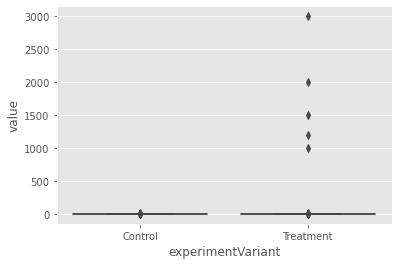

In [10]:
sns.boxplot(x = 'experimentVariant', y = 'value', data = data)

In [11]:
#прологорифмируем колонку value

In [12]:
data['value_log'] = np.log(data['value'])

In [13]:
data.head()

,Unnamed: 0,value,experimentVariant,value_log
0,1,10.380495,Control,2.339929
1,2,9.546867,Control,2.256213
2,3,11.088215,Control,2.405883
3,4,10.147274,Control,2.317205
4,5,9.789808,Control,2.281342


In [14]:
data.groupby('experimentVariant').value.count()

experimentVariant
Control      500
Treatment    500
Name: value, dtype: int64

<AxesSubplot:xlabel='experimentVariant', ylabel='value_log'>

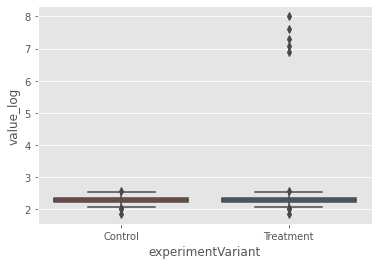

In [15]:
sns.boxplot(x = 'experimentVariant', y = 'value_log', data = data)

In [16]:
#смотрим на распределение

C:\Users\mesii\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

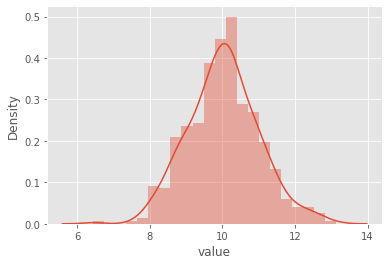

In [17]:
sns.distplot(data[data.experimentVariant == 'Control'].value)

C:\Users\mesii\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value', ylabel='Density'>

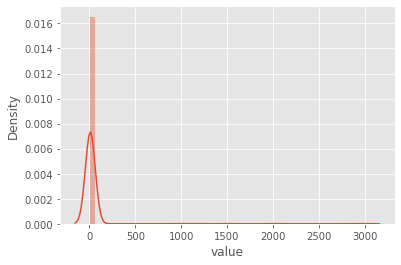

In [18]:
sns.distplot(data[data.experimentVariant == 'Treatment'].value)

C:\Users\mesii\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='value_log', ylabel='Density'>

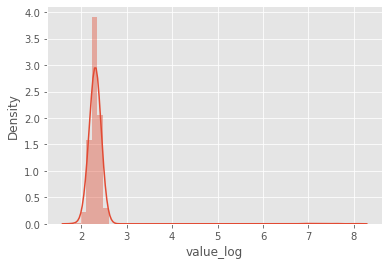

In [19]:
sns.distplot(data.value_log)

In [20]:
data.groupby('experimentVariant',as_index=False).value.mean() 

,experimentVariant,value
0,Control,10.026867
1,Treatment,27.321499


In [21]:
data.groupby('experimentVariant',as_index=False).value.median() 

,experimentVariant,value
0,Control,10.018465
1,Treatment,10.025847


In [22]:
ttest_ind(data[data.experimentVariant == 'Control'].value_log,
         data[data.experimentVariant == 'Treatment'].value_log)

Ttest_indResult(statistic=-2.1379349959049563, pvalue=0.03276440163234999)

In [23]:
ttest_ind(data[data.experimentVariant == 'Control'].value,
         data[data.experimentVariant == 'Treatment'].value)

Ttest_indResult(statistic=-2.0729020485356604, pvalue=0.038437593613498765)

In [24]:
#p_value  - меньше 0б05, делаем вывод что ьожем отклонить Н0

### 2. U-тест

In [25]:
data.head()

,Unnamed: 0,value,experimentVariant,value_log
0,1,10.380495,Control,2.339929
1,2,9.546867,Control,2.256213
2,3,11.088215,Control,2.405883
3,4,10.147274,Control,2.317205
4,5,9.789808,Control,2.281342


In [26]:
scipy.stats.mannwhitneyu(data[data.experimentVariant == 'Control'].value,
         data[data.experimentVariant == 'Treatment'].value)

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

In [ ]:
#А вот по второму тесту p_values < 0.05 Н0 отклонить не можем

### Bootstrap

In [3]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа

  0%|          | 0/1000 [00:00<?, ?it/s]

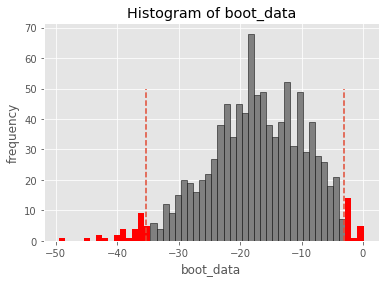

{'boot_data': [-19.820128467692484,
  -24.17140850474746,
  -6.290687938763064,
  -16.225689211362436,
  -13.30252704006403,
  -7.885229155017983,
  -13.700708283328153,
  -12.328343807361085,
  -0.052532978918085504,
  -14.699884931050056,
  -11.98423811912637,
  -5.26630575047729,
  -9.950443443782738,
  -5.910503155537146,
  -24.796333948801767,
  -13.926435757042377,
  -10.484879189327325,
  -15.945731600445093,
  -25.384069943228877,
  -23.06337434254966,
  -22.67107566042334,
  -7.044155771882117,
  -12.383786726380745,
  -28.232542791698673,
  -20.70382366227015,
  -17.860693002071965,
  -17.070497498595152,
  -19.87435209622221,
  -15.854176643346147,
  -37.50411481073916,
  -24.353460616052608,
  -9.92788615079529,
  -29.24929355692505,
  -12.38335953667513,
  -5.961147713902845,
  -8.870946442082067,
  -12.379393897411624,
  -15.091692248593736,
  -20.855968588761773,
  -22.24879764272508,
  -15.896077563183079,
  -17.615165838182165,
  -9.917219326624933,
  -17.3972336232128

In [29]:
get_bootstrap(
    data[data.experimentVariant == 'Control'].value, # числовые значения первой выборки
    data[data.experimentVariant == 'Treatment'].value, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
)

  0%|          | 0/1000 [00:00<?, ?it/s]

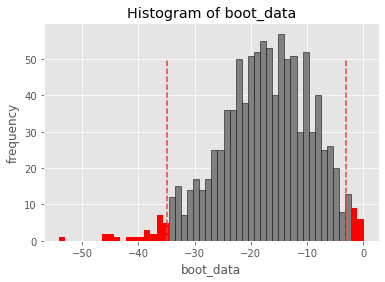

{'boot_data': [-19.223494714152274,
  -17.063630499729996,
  -26.978049156239592,
  -16.365980116988716,
  -16.815659291850924,
  -19.703854651301846,
  -14.387658455138524,
  -31.15212103254368,
  -30.951589623131174,
  -16.9869803956823,
  -20.282424231139622,
  -22.324634311300407,
  -19.857869600655242,
  -12.272791683601406,
  -24.426998880657727,
  -7.939133296988134,
  -9.341003165996328,
  -14.234330216004121,
  -9.937244661574228,
  -6.349778850023553,
  -4.317043840819956,
  -8.007664498794105,
  -23.85644218068404,
  -13.300163704476546,
  -13.938518779988069,
  -8.030157812126186,
  -20.18804686170612,
  -17.043978205920574,
  -14.927487501639881,
  -10.340961695774482,
  -14.737489577586242,
  -14.889183811429012,
  -23.834154778122105,
  -4.759817925373149,
  -23.647333680818072,
  -21.771548399973895,
  -20.324851262104225,
  -21.339454683977593,
  -10.19278902183051,
  -30.17749728011341,
  -17.745029358547505,
  -15.364639429932733,
  -25.69052951935006,
  -8.947163655

In [30]:
get_bootstrap(
    data[data.experimentVariant == 'Control'].value, # числовые значения первой выборки
    data[data.experimentVariant == 'Treatment'].value, # числовые значения второй выборки
    
)

In [ ]:
#Есть основания отклонить H0

In [28]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

In [13]:
# будем пробовать бутстрап на эксп. распределении
np.random.seed(5)

In [24]:
n = 1000

sample_1 = np.random.exponential(scale=1/0.001, size=n)
sample_2 = np.random.exponential(scale=1/0.001, size=n)

df = pd.DataFrame({
    "sample_1": sample_1,
    "sample_2": sample_2
})

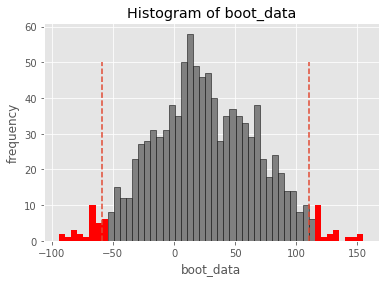

In [25]:
booted_data = get_bootstrap(df.sample_1, df.sample_2) # в результате хранится разница двух распределений, ДИ и pvalue

In [26]:
booted_data["p_value"] # альфа

0.5557839513974483

In [19]:
booted_data["quants"] # ДИ

,0
0.025,10.317755
0.975,165.295875





Верно следующее утверждение: Манн-Уитни и Бутстрап проверяют разные гипотезы. С помощью бутстрапа мы проверяем нулевую гипотезу о равенстве средних, а Манн-Уитни о равенстве распределений. Что значит равенство распределений? Это значит, что случайно выбранное значение из одной выборки может быть равновероятно больше или меньше случайного значения из другой выборки (иногда путают с равенством медиан, но на самом деле проверяется не только медиана). Также вы верно применили критерии и написали код


Про разное количество наблюдений в выборках: Манн-Уитни как и любой статистический оценщик не очень приветлив к дисбалансу. Это сказывается в первую очередь на мощности критерия – чем сильнее дисбаланс, тем реже критерий будет обнаруживать реальную разницу (эффект). Подробнее тут https://stats.stackexchange.com/questions/40342/mann-whitney-u-test-with-unequal-sample-sizes

## Итого
* Тестовая выборка имеет большие выбросы, что сильно искажает нам среднее значение
* Применяя бутстрап с оценкой среднего, мы могли бы отклонить нулевую гипотезу о равенстве средних и сделать вывод, что тестовая и контрольная выборка имеют различия
* Однако, тот же бутстрап, но уже по медиане не дает нам отклонить нулевую гипотезу, так как p-value сильно больше 0.05, т.к. здесь проверяется другая гипотеза
* U-критерий Манна-Уитни так же не дал бы нам отклонить нулевую гипотезу. Оценки pvalue так же направлены как у бутстрапирования медианы

